In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from datetime import date

In [2]:
import os
os.getcwd()

'/Users/zhaoxiaoxiang/kaggle/七月在线/class6'

In [3]:
data = pd.read_csv('/Users/zhaoxiaoxiang/kaggle/七月在线/class6/Combined_News_DJIA.csv')

In [7]:
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [8]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [11]:
X_train = train[train.columns[2:]]
corpus = X_train.values.flatten().astype(str)


In [12]:
corpus

array(['b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"',
       "b'BREAKING: Musharraf to be impeached.'",
       "b'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)'",
       ...,
       'New solar power material converts 90 percent of captured light into heat',
       'China launches website laying claim to Senkaku Islands',
       'At Least 33 Killed in Yemen Suicide Bombing'], dtype='<U312')

In [13]:
X_train = X_train.values.astype(str)
X_train = np.array([' '.join(x) for x in X_train])
X_test = test[test.columns[2:]]
X_test = X_test.values.astype(str)
X_test = np.array([' '.join(x) for x in X_test])
y_train = train['Label'].values
y_test = test['Label'].values

In [19]:
X_train[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [20]:
from nltk.tokenize import word_tokenize

corpus = [word_tokenize(x) for x in corpus]
X_train = [word_tokenize(x) for x in X_train]
X_test = [word_tokenize(x) for x in X_test]

In [26]:
# Preprocessing
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhaoxiaoxiang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
#Numbers
import re
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

In [29]:
#Special Character
def isSymbol(inputString):
    return bool(re.match(r'[^\w]', inputString))

In [30]:
# lemma, get the main meaning of the word
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [31]:
def check(word):
    """
    如果需要这个单词，则True
    如果应该去除，则False
    """
    word= word.lower()
    if word in stop:
        return False
    elif hasNumbers(word) or isSymbol(word):
        return False
    else:
        return True


In [32]:
def preprocessing(sen):
    res = []
    for word in sen:
        if check(word):
            # 这一段的用处仅仅是去除python里面byte存str时候留下的标识。。之前数据没处理好，其他case里不会有这个情况
            word = word.lower().replace("b'", '').replace('b"', '').replace('"', '').replace("'", '')
            res.append(wordnet_lemmatizer.lemmatize(word))
    return res

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhaoxiaoxiang/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [35]:
corpus = [preprocessing(x) for x in corpus]
X_train = [preprocessing(x) for x in X_train]
X_test = [preprocessing(x) for x in X_test]

In [38]:
#Train NLP model
from gensim.models.word2vec import Word2Vec

In [39]:
model = Word2Vec(corpus, size=128, window=5, min_count=5, workers=4)

In [41]:
# get all the vocabulary
vocab = model.wv.vocab

In [42]:
# get any text vector
def get_vector(word_list):
    res =np.zeros([128])
    count = 0
    for word in word_list:
        if word in vocab:
            res += model[word]
            count += 1
    return res/count  

['we']

In [44]:
wordlist_train = X_train
wordlist_test = X_test

X_train = [get_vector(x) for x in X_train]
X_test = [get_vector(x) for x in X_test]

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [45]:
print(X_train[10])

[-0.01683933  0.25555918 -0.07136841  0.24387711 -0.17234309  0.06329836
 -0.23092995  0.04411427  0.12729821  0.2698972   0.53539898  0.18929216
  0.40435192 -0.01136599 -0.17665914 -0.19585051  0.22409916 -0.4373892
  0.01919741  0.36905785 -0.22970183 -0.48157153  0.17762979  0.06352578
  0.43112815 -0.01675554 -0.18546379  0.30731745 -0.02042518 -0.05608069
  0.02348864 -0.23281427  0.23149502 -0.11141403 -0.09702485 -0.18838578
 -0.24070066  0.00812098  0.16671192 -0.1976849   0.19860913  0.23951515
  0.3345465  -0.28762921 -0.02195835  0.2141282  -0.38467779  0.27459685
  0.27120021  0.02069661 -0.08103097 -0.10118024  0.04539224 -0.17914928
  0.27976321 -0.10781417 -0.15149607  0.12291022 -0.24458624 -0.04871759
 -0.15371565  0.09670135  0.1913428  -0.22182535  0.3893323  -0.16523734
  0.03302039  0.04680915  0.00557255 -0.13136933 -0.04387049  0.31779814
  0.05275976 -0.0341851   0.17999149 -0.0961685  -0.12471706  0.14385702
  0.02046402 -0.23833462 -0.12943416  0.00959647 -0.

In [46]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [49]:
params = [0.1,0.5,1,3,5,7,10,12,16,20,25,30,35,40]
test_scores = []
for param in params:
    clf = SVR(gamma=param)
    test_score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    test_scores.append(np.mean(test_score))

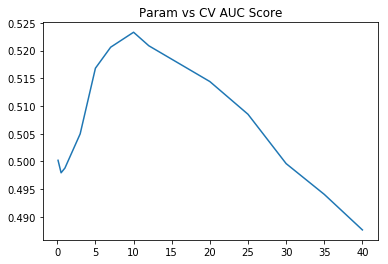

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("Param vs CV AUC Score");

In [51]:
def transform_to_matrix(x, padding_size=256, vec_size=128):
    res = []
    for sen in x:
        matrix = []
        for i in range(padding_size):
            try:
                matrix.append(model[sen[i]].tolist())
            except:
                matrix.append([0] * vec_size)
        res.append(matrix)
    return res

In [52]:
X_train = transform_to_matrix(wordlist_train)
X_test = transform_to_matrix(wordlist_test)

print(X_train[123])

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[[0.17832615971565247, 0.3509613573551178, -0.2392721325159073, 0.3182123303413391, -0.27483803033828735, -0.10534095764160156, -0.28532645106315613, 0.4607452154159546, 0.18416504561901093, 0.3834356367588043, 0.41378602385520935, 0.19194477796554565, 0.3330933451652527, -0.01598077267408371, -0.024950353428721428, -0.11726395785808563, 0.43794384598731995, -0.6145710945129395, 0.0009581911726854742, 0.4550114870071411, -0.186284139752388, -0.5788463354110718, 0.411300927400589, -0.19684229791164398, 0.31870678067207336, 0.15996883809566498, -0.41313135623931885, 0.6077390313148499, 0.011218410916626453, 0.18088845908641815, -0.002098464872688055, -0.5378596782684326, 0.36236894130706787, -0.017987314611673355, -0.12218691408634186, -0.0679173693060875, -0.07262596487998962, -0.10367833822965622, 0.36652764678001404, -0.07715289294719696, 0.2467755675315857, 0.19656403362751007, 0.41541826725006104, -0.26729413866996765, -0.13687366247177124, 0.20032286643981934, -0.6115003824234009, 

In [53]:
X_train = np.array(X_train)
X_test = np.array(X_test)

print(X_train.shape)
print(X_test.shape)

(1611, 256, 128)
(378, 256, 128)


In [62]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

ValueError: cannot reshape array of size 52789248 into shape (1611,1,1,256)

In [63]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten

# set parameters:
batch_size = 32
n_filter = 16
filter_length = 4
nb_epoch = 5
n_pool = 2

model = Sequential()
model.add(Convolution2D(n_filter,filter_length,filter_length,
                        input_shape=(1, 256, 128)))
model.add(Activation('relu'))
model.add(Convolution2D(n_filter,filter_length,filter_length))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))
model.add(Flatten())
# add an ANN
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))
#compile
model.compile(loss='mse',
              optimizer='adadelta',
              metrics=['accuracy'])

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (4, 4), input_shape=(1, 256, 1...)`
  from ipykernel import kernelapp as app


ValueError: Negative dimension size caused by subtracting 4 from 1 for 'conv2d_7/convolution' (op: 'Conv2D') with input shapes: [?,1,256,128], [4,4,128,16].

In [56]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.

In [64]:
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/Users/zhaoxiaoxiang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


RuntimeError: You must compile a model before training/testing. Use `model.compile(optimizer, loss)`.